In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import lbwsg
import lbwsg_boe
import lsff_interventions

In [3]:
%load_ext autoreload
%autoreload 2

# Define artifact directory

In [4]:
artifact_dir = '/share/costeffectiveness/artifacts/vivarium_conic_lsff/'
artifact_path = f'{artifact_dir}/nigeria.hdf'

# Set a random seed and pick 100 random draws

In [5]:
np.random.seed(5678)

In [7]:
draws = np.random.choice(1000, size=100)
draws

array([116, 151, 318, 914, 319, 188, 397, 253, 548, 955,  78, 159, 531,
       507, 590, 668, 350, 783, 901, 786,   6, 893, 115, 320, 517, 211,
       922, 527, 182, 713, 787, 787, 857,  24, 387, 883, 793, 273, 938,
       113, 341, 501, 760, 644, 960, 802,  82, 588,  77, 386, 149, 284,
       629, 530, 752, 276, 341, 636, 494, 544, 847, 480, 739, 333, 567,
       816,  14, 562, 166, 139, 968, 292, 505, 418, 154, 340, 979, 167,
       572, 940, 599, 209, 745, 760, 780, 225, 471, 666, 477, 450, 741,
       959, 946, 884, 783, 371, 942, 534, 166, 909])

# Do PIF calculation

In [14]:
%%time
calc = lbwsg_boe.IronBirthweightCalculator('Nigeria', artifact_path, 2017, draws, take_mean=True)
calc.do_back_of_envelope_calculation(100_000)

/ihme/homes/ndbs/vivarium_data_analysis/pre_processing/lbwsg/lbwsg.py:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if draws=='all':
/ihme/homes/ndbs/vivarium_data_analysis/pre_processing/lbwsg/lbwsg.py:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if draws=='all':


CPU times: user 8.67 s, sys: 551 ms, total: 9.22 s
Wall time: 12.9 s


In [16]:
if draws == '456':
    print('yak')

/ihme/homes/ndbs/miniconda3/envs/lsff/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


In [17]:
calc.global_data

GlobalIronFortificationData(draws=Index(['mean_of_100_draws'], dtype='object', name='draw'), birthweight_dose_response=draw
mean_of_100_draws    16.7
Name: birthweight_dose_response, dtype: float64)

In [18]:
calc.local_data

LocalIronFortificationData(location='Nigeria', iron_concentration=40, mean_daily_flour=137.9105447929826, mean_birthweight_shift=draw
mean_of_100_draws    9.212424
Name: mean_birthweight_shift, dtype: float64, eats_fortified=0.08168000000000002, eats_fortifiable=0.25)

In [20]:
0.25-.08168

0.16832

In [33]:
calc.potential_impact_fraction

draw
mean_of_100_draws    0.000536
Name: lbwsg_relative_risk, dtype: float64

# See how many relative risks decreased vs. increased

155 decreased (yay!) and 117 increased (boo!)

In [22]:
calc.baseline_pop.shape

(100000, 19)

In [23]:
calc.baseline_pop.head()

sex  age  age_start   age_end  \
draw              simulant_id                                     
mean_of_100_draws 0              Male  0.0        0.0  0.019178   
                  1              Male  0.0        0.0  0.019178   
                  2            Female  0.0        0.0  0.019178   
                  3            Female  0.0        0.0  0.019178   
                  4            Female  0.0        0.0  0.019178   

                               lbwsg_cat_propensity  ga_propensity  \
draw              simulant_id                                        
mean_of_100_draws 0                        0.829800       0.526493   
                  1                        0.218154       0.746717   
                  2                        0.365670       0.477782   
                  3                        0.110178       0.897576   
                  4                        0.718629       0.337644   

                               bw_propensity  iron_fortification_propensity  \
draw              simulant_id                                                 
mean_of_100_draws 0                 0.359801                       0.457714   
                  1                 0.126820                       0.079244   
                  2                 0.457061                       0.707236   
                  3                 0.967797                       0.129691   
                  4                 0.310429                       0.084470   

                               mother_flour_consumption_propensity lbwsg_cat  \
draw              simulant_id                                                  
mean_of_100_draws 0                                       0.559057     cat35   
                  1                                       0.953569     cat32   
                  2                                       0.177667     cat54   
                  3                                       0.065086     cat53   
                  4                                       0.148111     cat53   

                               gestational_age  birthweight  \
draw              simulant_id                                 
mean_of_100_draws 0                  37.526493  2179.900269   
                  1                  39.493434  2063.409900   
                  2                  38.955563  3728.530726   
                  3                  39.795153  4483.898686   
                  4                  38.675287  4155.214748   

                               treatment_deleted_birthweight  \
draw              simulant_id                                  
mean_of_100_draws 0                              2179.147798   
                  1                              2062.657429   
                  2                              3727.778255   
                  3                              4483.146215   
                  4                              4154.462278   

                               mother_is_iron_fortified  mother_daily_flour  \
draw              simulant_id                                                 
mean_of_100_draws 0                               False            0.000000   
                  1                                True          322.548791   
                  2                               False            0.000000   
                  3                               False            0.000000   
                  4                               False            0.000000   

                               birthweight_shift  treated_birthweight  \
draw              simulant_id                                           
mean_of_100_draws 0                     0.000000          2179.147798   
                  1                    21.546259          2084.203688   
                  2                     0.000000          3727.778255   
                  3                     0.000000          4483.146215   
                  4                     0.000000          4154.462278   

 

In [27]:
rr_decreases = calc.intervention_pop.lbwsg_relative_risk < calc.baseline_pop.lbwsg_relative_risk
rr_decreases.sum()

155

In [26]:
rr_increases = calc.intervention_pop.lbwsg_relative_risk > calc.baseline_pop.lbwsg_relative_risk
rr_increases.sum()

117

In [31]:
calc.baseline_pop.loc[rr_decreases].treated_birthweight.describe()

count     155.000000
mean     3129.909014
std       544.276012
min      1486.771422
25%      2990.896940
50%      2998.079697
75%      3495.503779
max      3999.809159
Name: treated_birthweight, dtype: float64

In [32]:
calc.baseline_pop.loc[rr_increases].treated_birthweight.describe()

count     117.000000
mean     3506.522824
std       250.346128
min      2983.410551
25%      3490.364682
50%      3495.133431
75%      3498.476778
max      3999.279588
Name: treated_birthweight, dtype: float64

In [34]:
calc.baseline_pop.loc[rr_decreases].treated_lbwsg_cat.value_counts()

cat44     44
cat51     37
cat54     22
cat43     13
cat42     10
cat35      5
cat34      4
cat32      3
cat30      3
cat28      3
cat40      2
cat36      2
cat117     1
cat22      1
cat26      1
cat25      1
cat21      1
cat24      1
cat23      1
Name: treated_lbwsg_cat, dtype: int64

In [37]:
calc.intervention_pop.loc[rr_decreases].treated_lbwsg_cat.value_counts()

cat52    44
cat55    37
cat53    22
cat51    13
cat48    10
cat42     5
cat37     4
cat34     3
cat44     3
cat33     3
cat45     2
cat40     2
cat20     1
cat27     1
cat35     1
cat32     1
cat29     1
cat88     1
cat36     1
Name: treated_lbwsg_cat, dtype: int64

In [35]:
calc.baseline_pop.loc[rr_increases].treated_lbwsg_cat.value_counts()

cat52    69
cat48    13
cat54    13
cat37     8
cat33     5
cat50     2
cat95     2
cat45     2
cat39     2
cat47     1
Name: treated_lbwsg_cat, dtype: int64

In [36]:
calc.intervention_pop.loc[rr_increases].treated_lbwsg_cat.value_counts()

cat54    69
cat50    13
cat53    13
cat39     8
cat95     5
cat49     2
cat96     2
cat41     2
cat47     2
cat46     1
Name: treated_lbwsg_cat, dtype: int64

# Plot BW and GA

In [45]:
bpop = calc.baseline_pop
ipop = calc.intervention_pop

Text(0, 0.5, 'gestational age (wks)')

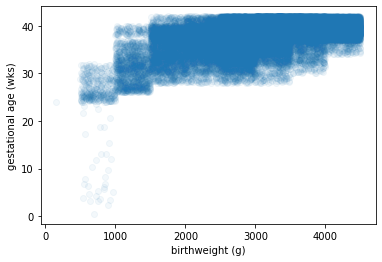

In [43]:
plt.scatter(calc.baseline_pop.treated_birthweight, calc.baseline_pop.gestational_age, alpha=0.05)
plt.xlabel('birthweight (g)')
plt.ylabel('gestational age (wks)')

Baseline mean BW:  3176.79602884485


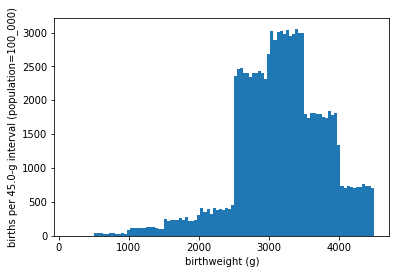

In [40]:
print('Baseline mean BW: ', calc.baseline_pop.treated_birthweight.mean())
plt.hist(calc.baseline_pop.treated_birthweight, bins=100, density=False)
plt.xlabel('birthweight (g)')
plt.ylabel(f'births per {4500/100}-g interval (population=100_000)')
plt.show()

Intervention mean BW:  3178.3373813301564


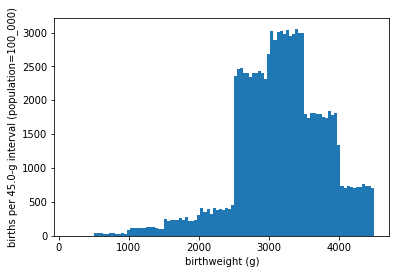

In [41]:
print('Intervention mean BW: ', calc.intervention_pop.treated_birthweight.mean())
plt.hist(calc.baseline_pop.treated_birthweight, bins=100, density=False)
plt.xlabel('birthweight (g)')
plt.ylabel(f'births per {4500/100}-g interval (population=100_000)')
plt.show()

In [65]:
def plot_bw_ga_scatter(ax, bw, ga, **scatter_kwargs):
    ax.scatter(bw, ga, **scatter_kwargs)
    ax.set_xlabel('birthweight (g)')
    ax.set_ylabel('gestational age (weeks)')

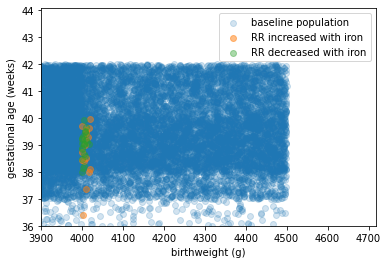

In [75]:
def plot_simulants_by_change_in_rr(ax, bpop, ipop):
    
    rr_increases = ipop.lbwsg_relative_risk > bpop.lbwsg_relative_risk
    rr_decreases = ipop.lbwsg_relative_risk < bpop.lbwsg_relative_risk
    
    baseline_kwargs=dict(label='baseline population', alpha=0.2)
    plot_bw_ga_scatter(
        ax,
        bpop.treated_birthweight,
        bpop.gestational_age,
        **baseline_kwargs
    )

    increass_kwargs=dict(label='RR increased with iron', alpha=0.5)
    plot_bw_ga_scatter(
        ax,
        ipop.loc[rr_increases].treated_birthweight,
        ipop.loc[rr_increases].gestational_age,
        **increass_kwargs
    )
    
    decreass_kwargs=dict(label='RR decreased with iron', alpha=0.4)
    plot_bw_ga_scatter(
        ax,
        ipop.loc[rr_decreases].treated_birthweight,
        ipop.loc[rr_decreases].gestational_age,
        **decreass_kwargs
    )
    
    ax.set_title(f'Simulated population of size {len(bpop)}')
    ax.legend()

fig, ax = plt.subplots(1,1)
plot_simulants_by_change_in_rr(ax, bpop, ipop)
ax.set_ylim(bottom=36)
ax.set_xlim(left=3900)
plt.show()

# How can some simulants' RR's increase and some decrease when they cross the same boundary??

## RR's for males and females are different!

In [72]:
ipop.loc[rr_increases].query('3900 < treated_birthweight < 4100')

sex  age  age_start   age_end  \
draw              simulant_id                                     
mean_of_100_draws 4491         Female  0.0        0.0  0.019178   
                  4513           Male  0.0        0.0  0.019178   
                  11049          Male  0.0        0.0  0.019178   
                  22059          Male  0.0        0.0  0.019178   
                  36710          Male  0.0        0.0  0.019178   
                  38989          Male  0.0        0.0  0.019178   
                  39373          Male  0.0        0.0  0.019178   
                  47606          Male  0.0        0.0  0.019178   
                  49516          Male  0.0        0.0  0.019178   
                  52231          Male  0.0        0.0  0.019178   
                  67244          Male  0.0        0.0  0.019178   
                  68694          Male  0.0        0.0  0.019178   
                  79304          Male  0.0        0.0  0.019178   
                  80314          Male  0.0        0.0  0.019178   
                  85060          Male  0.0        0.0  0.019178   
                  93724          Male  0.0        0.0  0.019178   

                               lbwsg_cat_propensity  ga_propensity  \
draw              simulant_id                                        
mean_of_100_draws 4491                     0.119104       0.386189   
                  4513                     0.518014       0.849391   
                  11049                    0.313841       0.377254   
                  22059                    0.696716       0.212218   
                  36710                    0.024878       0.603360   
                  38989                    0.663495       0.724231   
                  39373                    0.054941       0.254499   
                  47606                    0.012201       0.216849   
                  49516                    0.927523       0.991766   
                  52231                    0.020816       0.975802   
                  67244                    0.128567       0.378076   
                  68694                    0.808402       0.493525   
                  79304                    0.134328       0.049738   
                  80314                    0.747047       0.813976   
                  85060                    0.566306       0.782059   
                  93724                    0.643831       0.648832   

                               bw_propensity  iron_fortification_propensity  \
draw              simulant_id                                                 
mean_of_100_draws 4491              0.997020                       0.171216   
                  4513              0.994420                       0.115412   
                  11049             0.966540                       0.221046   
                  22059             0.974026                       0.128603   
                  36710             0.000064                       0.238889   
                  38989             0.987113                       0.225307   
                  39373             0.998427                       0.229270   
                  47606             0.999062                       0.151137   
                  49516             0.993893                       0.201715   
                  52231             0.996294                       0.105368   
                  67244             0.983283                       0.153256   
                  68694             0.974928                       0.193410   
                  79304             0.998722                       0.126518   
                  80314             0.998299                       0.148610   
                  85060             0.996014                       0.120606   
                  93724             0.994293                       0.239791   

                               mother_flour_consumption_propensity lbwsg_cat  \
draw              simulant_id                                  

In [73]:
ipop.loc[rr_decreases].query('3900 < treated_birthweight < 4100')

sex  age  age_start   age_end  \
draw              simulant_id                                     
mean_of_100_draws 31           Female  0.0        0.0  0.019178   
                  3413         Female  0.0        0.0  0.019178   
                  3732         Female  0.0        0.0  0.019178   
                  10410        Female  0.0        0.0  0.019178   
                  12066        Female  0.0        0.0  0.019178   
                  19150        Female  0.0        0.0  0.019178   
                  26189        Female  0.0        0.0  0.019178   
                  32436        Female  0.0        0.0  0.019178   
                  38589        Female  0.0        0.0  0.019178   
                  51734        Female  0.0        0.0  0.019178   
                  53973        Female  0.0        0.0  0.019178   
                  53977        Female  0.0        0.0  0.019178   
                  58656        Female  0.0        0.0  0.019178   
                  66428        Female  0.0        0.0  0.019178   
                  68535        Female  0.0        0.0  0.019178   
                  69541        Female  0.0        0.0  0.019178   
                  70790        Female  0.0        0.0  0.019178   
                  73927        Female  0.0        0.0  0.019178   
                  85743        Female  0.0        0.0  0.019178   
                  91974        Female  0.0        0.0  0.019178   
                  93932        Female  0.0        0.0  0.019178   
                  99731        Female  0.0        0.0  0.019178   

                               lbwsg_cat_propensity  ga_propensity  \
draw              simulant_id                                        
mean_of_100_draws 31                       0.140588       0.955569   
                  3413                     0.223682       0.634442   
                  3732                     0.093301       0.564211   
                  10410                    0.459349       0.749162   
                  12066                    0.412812       0.515560   
                  19150                    0.906247       0.437283   
                  26189                    0.825397       0.005638   
                  32436                    0.060644       0.429540   
                  38589                    0.786229       0.291283   
                  51734                    0.332242       0.526731   
                  53973                    0.672610       0.102117   
                  53977                    0.421439       0.517089   
                  58656                    0.456126       0.327500   
                  66428                    0.988795       0.073302   
                  68535                    0.243078       0.767980   
                  69541                    0.121849       0.594554   
                  70790                    0.325997       0.674021   
                  73927                    0.904780       0.233210   
                  85743                    0.574491       0.620174   
                  91974                    0.708184       0.826047   
                  93932                    0.420122       0.540520   
                  99731                    0.814638       0.700883   

                               bw_propensity  iron_fortification_propensity  \
draw              simulant_id                                                 
mean_of_100_draws 31                0.984550                       0.195813   
                  3413              0.992550                       0.128146   
                  3732              0.996181                       0.166612   
                  10410             0.992968                       0.211301   
                  12066             0.991243                       0.219897   
                  19150             0.991467                       0.123470   
                  26189             0.995124                       0.135493   
                  32436          

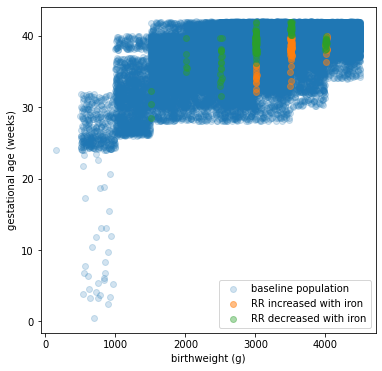

In [77]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
plot_simulants_by_change_in_rr(ax, bpop, ipop)
# ax.set_ylim(bottom=36)
# ax.set_xlim(left=3900)
plt.show()

# Get some statistics and verify some results

In [78]:
bpop.loc[bpop.mother_is_iron_fortified, 'birthweight_shift'].describe()

count    8223.000000
mean        9.261076
std         6.167331
min         0.000661
25%         5.204620
50%         6.908834
75%        13.330397
max        23.407500
Name: birthweight_shift, dtype: float64

In [79]:
ipop.loc[ipop.mother_is_iron_fortified, 'birthweight_shift'].describe()

count    24918.000000
mean         9.252608
std          6.201363
min          0.000627
25%          5.180933
50%          6.805260
75%         13.442532
max         23.413385
Name: birthweight_shift, dtype: float64

In [81]:
24918-8223 # Number of simulants with new fortification

16695

In [82]:
(155+117)/16695 # Proportion of newly fortified simulants whose RR changed, about 1.6%

0.016292303084755915

In [84]:
(16695/100_000) * 9.252608 # This should be the mean BW shift in whole population

1.5447229056